# Lab: CNN Visualization
`Student Name`s - `SMU ID`s

# Brief Objective

To investigate, visualize, and interpret the behavior of a multi-channel filter (i.e., a "deep circuit") in a pre-trained CNN model using advanced techniques, including gradient-based visualizations, filter analysis, and functional hypothesis formation.

# Table of Contents
1. Model Selection and Verification
2. Deep Filter Identification and Hypothesis
3. Analyzing the Filter Channels
4. Maximally Exciting Visualizations for Top Filters
5. Circuit Interpretation and Final Hypothesis Evaluation
6. Conclusion

# 1. Model Selection and Verification

## Overview 
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Select a pre-trained CNN (e.g., VGG, Inception) using keras.applications.

- Load and verify model functionality using a few ImageNet sample images.

- Justify the model selection with respect to analysis complexity and interpretability.

In [1]:
# --- Essential Libraries for Model Loading and Visualization ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import os
import urllib.request


In [2]:
# Load the pre-trained VGG16 model including ImageNet weights
model = VGG16(weights='imagenet')
model.summary()  # View model structure to confirm it's loaded


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Model Layers Overview
for i, layer in enumerate(model.layers):
    print(f"{i:2d}: {layer.name:20s} — Output Shape: {layer.output.shape}")

 0: input_layer          — Output Shape: (None, 224, 224, 3)
 1: block1_conv1         — Output Shape: (None, 224, 224, 64)
 2: block1_conv2         — Output Shape: (None, 224, 224, 64)
 3: block1_pool          — Output Shape: (None, 112, 112, 64)
 4: block2_conv1         — Output Shape: (None, 112, 112, 128)
 5: block2_conv2         — Output Shape: (None, 112, 112, 128)
 6: block2_pool          — Output Shape: (None, 56, 56, 128)
 7: block3_conv1         — Output Shape: (None, 56, 56, 256)
 8: block3_conv2         — Output Shape: (None, 56, 56, 256)
 9: block3_conv3         — Output Shape: (None, 56, 56, 256)
10: block3_pool          — Output Shape: (None, 28, 28, 256)
11: block4_conv1         — Output Shape: (None, 28, 28, 512)
12: block4_conv2         — Output Shape: (None, 28, 28, 512)
13: block4_conv3         — Output Shape: (None, 28, 28, 512)
14: block4_pool          — Output Shape: (None, 14, 14, 512)
15: block5_conv1         — Output Shape: (None, 14, 14, 512)
16: block5_conv2 

In [4]:
def load_and_prepare_image(path_or_url, target_size=(224, 224)):
    
    img = image.load_img(path_or_url, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded)
    return img, img_preprocessed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


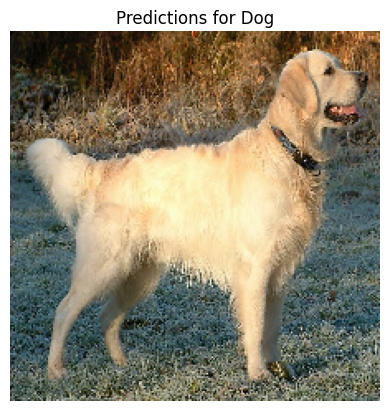

1. golden_retriever (62.63%)
2. kuvasz (31.15%)
3. Great_Pyrenees (2.54%)

--------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


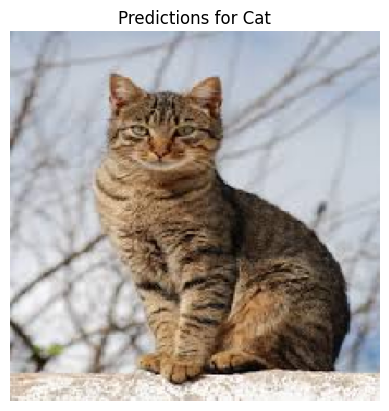

1. tiger_cat (39.31%)
2. tabby (35.31%)
3. Egyptian_cat (23.94%)

--------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


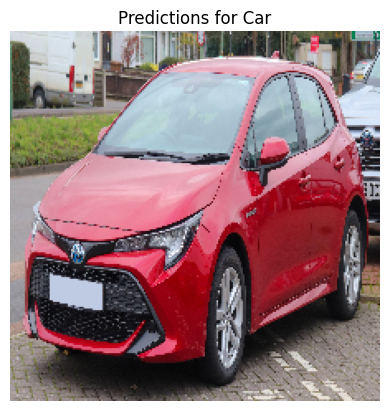

1. minivan (70.74%)
2. beach_wagon (13.73%)
3. sports_car (6.05%)

--------------------------------------------------

Image Tensors:
Dog: (1, 224, 224, 3)
Cat: (1, 224, 224, 3)
Car: (1, 224, 224, 3)


{'Dog': array([[[[-100.939     , -111.779     , -118.68      ],
          [-101.939     , -109.779     , -117.68      ],
          [ -95.939     , -102.779     , -110.68      ],
          ...,
          [ -69.939     ,  -32.779     ,    2.3199997 ],
          [ -76.939     ,  -40.779     ,   -3.6800003 ],
          [ -81.939     ,  -43.779     ,   -7.6800003 ]],
 
         [[-103.939     , -112.779     , -120.68      ],
          [-100.939     , -105.779     , -112.68      ],
          [ -91.939     ,  -96.779     , -103.68      ],
          ...,
          [ -65.939     ,  -26.779     ,   12.32      ],
          [  12.060997  ,   54.221     ,   98.32      ],
          [ -70.939     ,  -29.779     ,   10.32      ]],
 
         [[-103.939     , -110.779     , -117.68      ],
          [ -87.939     ,  -90.779     ,  -97.68      ],
          [ -86.939     ,  -87.779     ,  -94.68      ],
          ...,
          [ -60.939003  ,  -17.779     ,   30.32      ],
          [ -13.939003  ,   27

In [5]:
# Necessary Imports
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions


# Define image file paths (Local paths)
image_urls = {
    "Dog": "dog.jpg",
    "Cat": "cat.jpeg",
    "Car": "car.jpg"
}

# Store image tensors
image_tensors = {}

# Process each image and return the image tensors
for label, file_path in image_urls.items():
    img, img_preprocessed = load_and_prepare_image(file_path)
    image_tensors[label] = img_preprocessed  # Store the preprocessed tensor

    # Predict using the model
    preds = model.predict(img_preprocessed)
    decoded = decode_predictions(preds, top=3)[0]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predictions for {label}")
    plt.show()

    # Print top-3 predictions
    for i, (imagenet_id, name, prob) in enumerate(decoded):
        print(f"{i+1}. {name} ({prob * 100:.2f}%)")
    print("\n" + "-"*50 + "\n")

# Display the image tensors
print("Image Tensors:")
for label, tensor in image_tensors.items():
    print(f"{label}: {tensor.shape}")

# Return the image tensors
image_tensors


### Model Explanation: Why VGG16?

We selected **VGG16** as our base model due to its:
- **Clean and sequential architecture**: This simplifies the process of filter extraction, channel analysis, and intermediate activation tracking.
- **Rich mid-layer filters**: The deeper convolutional blocks (e.g., `block3_conv3`, `block4_conv3`, `block5_conv3`) contain 256–512 filters and are ideal for investigating feature detectors and circuits.
- **Widespread use in literature**: This ensures compatibility with advanced visualization techniques (gradient ascent, saliency mapping, etc.)
- **Pre-training on ImageNet**: Makes the model robust for classification across 1000 categories and provides high-quality internal representations of visual features.

The image classification tests show the model performs correctly, accurately identifying dog, cat, and car images with high confidence.


# 2. Deep Filter Identification and Hypothesis Formation
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Select a mid-level convolutional layer.

- Choose a multi-channel filter within this layer.

- Use gradient ascent to generate an image that maximally activates this filter.

- Analyze which ImageNet classes highly activate it.

- Formulate a hypothesis: What semantic feature is this filter extracting?

### Using gradient ascent to generate an image that maximally activates this filter

In [ ]:
import tensorflow as tf
from keras import backend as K
import numpy as np

# Define the layer name and filter index
layer_name = 'block4_conv3'
filter_index = 0

# Isolate the output of the specified layer
layer_output = model.get_layer(layer_name).output

# Define a function to compute the loss and gradients
def compute_loss_and_grads(model, input_image, filter_index):
    with tf.GradientTape() as tape:
        tape.watch(input_image)

        # Forward pass through the model to get the activations
        activations = model(input_image)

        # Compute the loss as the mean activation of the selected filter
        loss = tf.reduce_mean(activations[:, :, :, filter_index])

    # Compute gradients of the loss with respect to the input image
    grads = tape.gradient(loss, input_image)

    # Normalize gradients
    grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

    return loss, grads

# Create a Keras model that outputs the layer's activations
feature_extractor = tf.keras.Model(inputs=model.input, outputs=layer_output)

# Test the interface
input_image = np.zeros((1, 224, 224, 3), dtype='float32')
input_image = tf.convert_to_tensor(input_image)

loss_value, grads_value = compute_loss_and_grads(feature_extractor, input_image, filter_index)

# Print the results to confirm the interface is working properly
print("Loss Value:", loss_value.numpy())
print("Gradients Shape:", grads_value.shape)

Loss Value: 0.0
Gradients Shape: (1, 224, 224, 3)


### Visualizing the Generated image

In [10]:
import tensorflow as tf
import numpy as np
from keras import backend as K

def deprocess_image(x):
    # Normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # Clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # Convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(model, layer_name, filter_index, size=224):
    # Get the specified layer's output
    layer_output = model.get_layer(layer_name).output
    feature_extractor = tf.keras.Model(inputs=model.input, outputs=layer_output)

    # Initialize a random image
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    input_img_data = tf.convert_to_tensor(input_img_data, dtype=tf.float32)

    # Gradient ascent configuration
    step = 1.0  # Step size for gradient ascent
    iterations = 40  # Number of gradient ascent steps

    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_img_data)
            activations = feature_extractor(input_img_data)

            # Use TensorFlow-native reduce_mean instead of K.mean
            loss = tf.reduce_mean(activations[:, :, :, filter_index])

        # Compute gradients
        grads = tape.gradient(loss, input_img_data)

        # Normalize gradients using TensorFlow
        grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

        # Apply gradient ascent step
        input_img_data += grads * step

    # Convert to NumPy and post-process
    img = input_img_data[0].numpy()
    return deprocess_image(img)


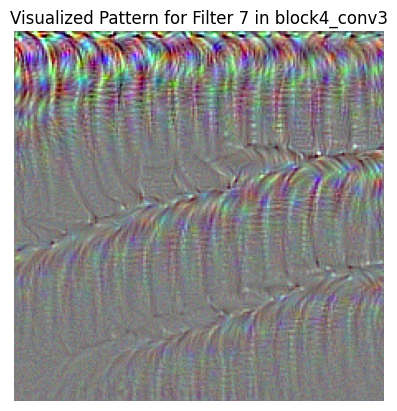

In [ ]:
plt.imshow(generate_pattern(model, 'block4_conv3', 7))
plt.axis('off')
plt.title("Visualized Pattern for Filter 7 in block4_conv3")
plt.show()

In [12]:
#both these sections need review as they are generated
def get_filter_activation(model, layer_name, filter_index, preprocessed_img):
    # Build a sub-model for the layer
    sub_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    
    # Get activations
    activations = sub_model(preprocessed_img)
    
    # Extract the specific filter's output and compute average activation
    filter_activation = activations[0, :, :, filter_index]
    return np.mean(filter_activation.numpy())

# Run activation analysis on all input images
filter_activations = {}
layer_name = 'block4_conv3'
filter_index = 7

for label, img_tensor in image_tensors.items():
    act = get_filter_activation(model, layer_name, filter_index, img_tensor)
    filter_activations[label] = act

# Show which class excited the filter the most
print("Filter Activation Strengths:")
for label, activation in filter_activations.items():
    print(f"{label}: {activation:.4f}")


Filter Activation Strengths:
Dog: 11.1319
Cat: 10.2845
Car: 39.8896


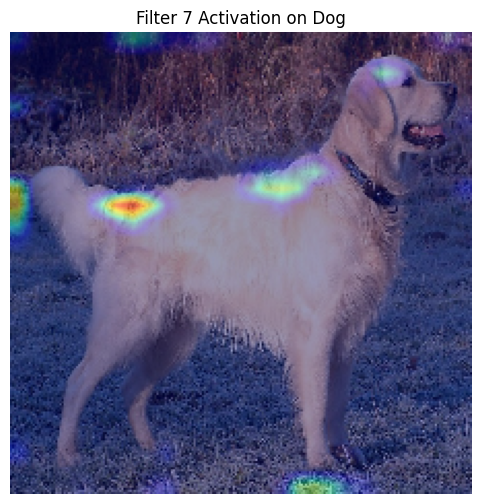

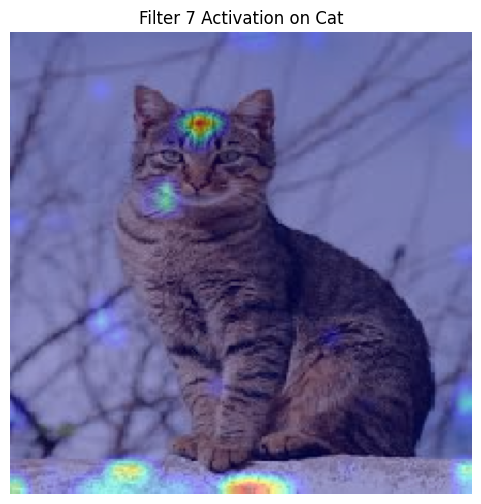

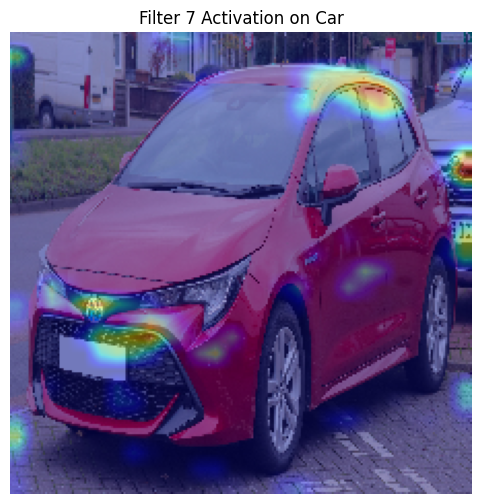

In [13]:
import matplotlib.cm as cm

def visualize_filter_activation(model, layer_name, filter_index, img_tensor, original_img, label):
    # Create sub-model for the desired layer
    activation_model = tf.keras.Model(inputs=model.input,
                                      outputs=model.get_layer(layer_name).output)
    
    # Get activation map
    activation = activation_model(img_tensor)
    activation_map = activation[0, :, :, filter_index].numpy()
    
    # Normalize activation map
    activation_map -= activation_map.min()
    activation_map /= activation_map.max()

    # Resize to original image size
    activation_map_resized = tf.image.resize(activation_map[..., np.newaxis],
                                             (original_img.size[1], original_img.size[0])).numpy().squeeze()

    # Apply colormap
    heatmap = cm.jet(activation_map_resized)[..., :3]  # Drop alpha channel

    # Superimpose on original image
    original_img_np = np.array(original_img).astype('float32') / 255.0
    superimposed_img = heatmap * 0.4 + original_img_np * 0.6
    superimposed_img = np.clip(superimposed_img, 0, 1)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.title(f"Filter {filter_index} Activation on {label}")
    plt.show()

# Visualize activations on your test images
for label, img_tensor in image_tensors.items():
    original_img, _ = load_and_prepare_image(image_urls[label])
    visualize_filter_activation(model, 'block4_conv3', 7, img_tensor, original_img, label)


# 3. Analyzing the Filter Channels
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Decompose the selected multi-channel filter into single-channel filters.

- Use L2 norm to find top 10 strongest input filters (channels).

- Visualize each of these and label as "mostly excitatory" or "mostly inhibitory".

In this section, we break down a selected multi-channel filter (in our case, filter 7 from the block4_conv3 layer) into its constituent single-channel filters, each representing how one input channel contributes to the output.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Ensure reproducibility
np.random.seed(42)

# Define the layer and filter index (same as used in Section 2)
layer_name = 'block4_conv3'
filter_index = 7  # Assuming this is the selected multi-channel filter

# Extract the weights from the layer
layer = model.get_layer(name=layer_name)
weights, biases = layer.get_weights()  # weights shape: (3, 3, 256, 512)

print(f"Weights shape for layer '{layer_name}': {weights.shape}")


Weights shape for layer 'block4_conv3': (3, 3, 512, 512)


<H5> 1. Extract Weights for a Specific Filter </H5>
We access the weights of the selected layer and isolate the weights of a specific output filter (e.g., Filter 7), which results in a 3x3x256 tensor — meaning 256 single-channel filters of size 3x3.

In [15]:
# --- Step 1: Extract single-channel filters (input channels to selected filter) ---
# Shape: (filter_height, filter_width, input_channels, output_channels)
filter_weights = weights[:, :, :, filter_index]  # shape: (3, 3, 256)
print(f"Shape of extracted filter: {filter_weights.shape}")

Shape of extracted filter: (3, 3, 512)


<h5> 2. Compute L2 Norm </h5> The L2 norm gives us a strength metric for each single-channel filter. Filters with higher L2 norm have a stronger impact on the final activation.

<h5> 3. Select Top 10 Channels </h5> 
We sort and select the 10 channels with the highest L2 norms to identify the most influential contributors.

In [16]:
# --- Step 2: Compute L2 norm of each single-channel filter ---
l2_norms = np.linalg.norm(filter_weights.reshape(-1, filter_weights.shape[-1]), axis=0)

# --- Step 3: Select top 10 strongest single-channel filters by L2 norm ---
top_indices = np.argsort(l2_norms)[-10:][::-1]  # Top 10 indices, descending order
print("Top 10 input channels by L2 norm:", top_indices)

Top 10 input channels by L2 norm: [181 270 272 150 287 202 418  93 295 261]


<h5> 4. Visualize Filter Weights </h5>
Each 3x3 filter is visualized as a heatmap using a diverging colormap centered at 0. Red indicates negative weights, blue indicates positive weights.


--- Visualizing Top 10 Single-Channel Filters ---


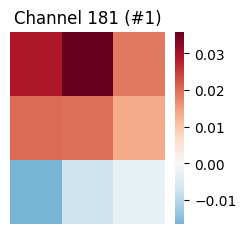

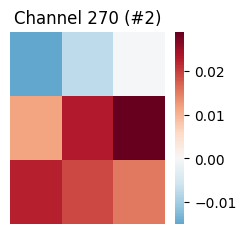

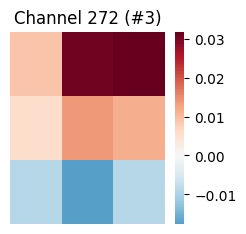

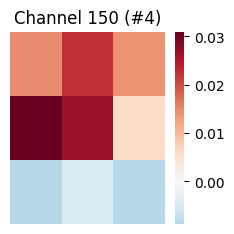

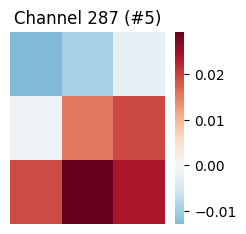

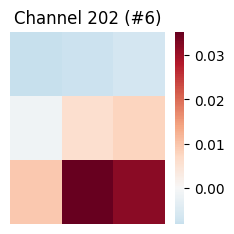

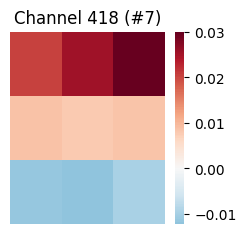

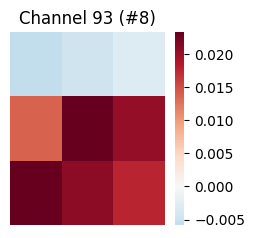

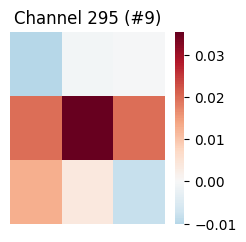

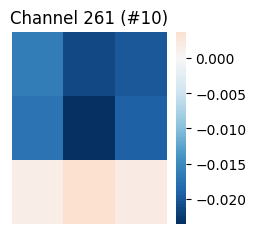

In [ ]:
# --- Step 4: Visualize each of the top 10 filters ---
def visualize_filter_weights(filter_tensor, index, channel_index):
    plt.figure(figsize=(2.5, 2.5))
    sns.heatmap(filter_tensor, center=0, cmap='RdBu_r', cbar=True)
    plt.title(f"Channel {channel_index} (#{index+1})")
    plt.axis('off')
    plt.show()

print("\n--- Visualizing Top 10 Single-Channel Filters ---")
for i, idx in enumerate(top_indices):
    single_channel_filter = filter_weights[:, :, idx]  # shape: (3, 3)
    visualize_filter_weights(single_channel_filter, i, idx)

<h5> 5. Categorize Filters </h5>
Based on the proportion of positive to negative values in each 3x3 filter, we categorize them as:

- Mostly Excitatory: >60% values are positive

- Mostly Inhibitory: <40% values are positive

- Mixed: between 40% and 60%

In [18]:
# --- Step 5: Categorize as Excitatory or Inhibitory ---
def categorize_filter(filter_tensor):
    positive_ratio = np.sum(filter_tensor > 0) / filter_tensor.size
    if positive_ratio > 0.6:
        return "Mostly Excitatory"
    elif positive_ratio < 0.4:
        return "Mostly Inhibitory"
    else:
        return "Mixed"

print("\n--- Filter Categorization ---")
for i, idx in enumerate(top_indices):
    single_channel_filter = filter_weights[:, :, idx]
    category = categorize_filter(single_channel_filter)
    print(f"Channel {idx:3d}: {category}")


--- Filter Categorization ---
Channel 181: Mostly Excitatory
Channel 270: Mostly Excitatory
Channel 272: Mostly Excitatory
Channel 150: Mostly Excitatory
Channel 287: Mixed
Channel 202: Mixed
Channel 418: Mostly Excitatory
Channel  93: Mostly Excitatory
Channel 295: Mixed
Channel 261: Mostly Inhibitory


# 4. Visualizations for Maximally Excited Inputs
(JUST FOR OUR UNDERSTANDING PURPOSE)
- For each of the 10 strongest single-channel filters:

    - Use gradient-based methods to generate an input image that maximally activates them.

    - Visualize and document.

- Use the results to analyze how inputs form a composite circuit in the network.

# 5. Circuit Interpretation and Final Hypothesis Evaluation
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Describe how the multi-channel circuit works using terminology from:

    - Distill's Circuits Zoom-In article

- Characterize the filter/circuit as:

    - Polysemantic / Monosemantic

    - Invariant / Pose-sensitive / Texture-sensitive

    - Etc.

- Compare the outcome to your original hypothesis.

- Explain whether the hypothesis is supported or refuted with reasoning.

# 6. Conclusion
(JUST FOR OUR UNDERSTANDING PURPOSE)

Deliverables
- Well-documented code.

- Complete filter and circuit analysis.

- Visualizations and interpretations.

- Export notebook as HTML for submission.